In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"Titanic_train.csv", index_col=0)
data.index = range(len(data))
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data['Family'] = data['SibSp'] + data['Parch']
data.drop(labels=['SibSp','Parch', 'Name', 'Ticket'], axis=1, inplace=True)
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
 5   Cabin     204 non-null    object 
 6   Embarked  889 non-null    object 
 7   Family    891 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [4]:
from sklearn.impute import SimpleImputer
Age = data.loc[:,'Age'].values.reshape(-1,1)
imp_median = SimpleImputer(strategy='median')
imp_median = imp_median.fit_transform(Age)
data.loc[:,'Age'] = imp_median

In [5]:
Embarked = data.loc[:,'Embarked'].values.reshape(-1,1)
imp_most = SimpleImputer(strategy='most_frequent')
imp_most = imp_most.fit_transform(Embarked)
data.loc[:,'Embarked'] = imp_most

In [6]:
data.drop(labels=['Cabin'],axis=1,inplace=True)

In [7]:
data.info()
#data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    object 
 6   Family    891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


## 2.1.4编码
### 分类型

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
x = data.iloc[:,2]
le = LabelEncoder()
le = le.fit(x)
le_result = le.transform(x)
data.iloc[:,2] = le_result
le.classes_

array(['female', 'male'], dtype=object)

In [10]:
from sklearn.preprocessing import OneHotEncoder
x = data.iloc[:,5].values.reshape(-1,1)
oe = OneHotEncoder(categories='auto')
oe = oe.fit(x)
oe_result = oe.transform(x).toarray()
oe.get_feature_names()

d:\Users\69243\anaconda3\envs\test\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_C', 'x0_Q', 'x0_S'], dtype=object)

In [11]:
data

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,1,22.0,7.2500,S,1
1,1,1,0,38.0,71.2833,C,1
2,1,3,0,26.0,7.9250,S,0
3,1,1,0,35.0,53.1000,S,1
4,0,3,1,35.0,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,S,0
887,1,1,0,19.0,30.0000,S,0
888,0,3,0,28.0,23.4500,S,3
889,1,1,1,26.0,30.0000,C,0


In [12]:
data = pd.concat([data,pd.DataFrame(oe_result)],axis=1)
data.drop(labels=["Embarked"],axis=1,inplace=True)
data.columns = ['Survived','Pclass','Sex','Age','Fare','Family','Embarked_C','Embarked_Q','Embarked_S']
data.head()

,Survived,Pclass,Sex,Age,Fare,Family,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,7.2500,1,0.0,0.0,1.0
1,1,1,0,38.0,71.2833,1,1.0,0.0,0.0
2,1,3,0,26.0,7.9250,0,0.0,0.0,1.0
3,1,1,0,35.0,53.1000,1,0.0,0.0,1.0
4,0,3,1,35.0,8.0500,0,0.0,0.0,1.0


### 连续型

In [13]:
from sklearn.preprocessing import Binarizer
bin_en = Binarizer(threshold=28)
age = data.iloc[:,3].values.reshape(-1,1)
bin_en = bin_en.fit(age)
age_result = bin_en.transform(age)
age_result

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],

In [14]:
from sklearn.preprocessing import KBinsDiscretizer
kb_en = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform")
age = data.iloc[:,3].values.reshape(-1, 1)
age_result = kb_en.fit_transform(age)
age_result

array([[1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [3.],
       [0.],
       [1.],
       [0.],
       [0.],
       [3.],
       [1.],
       [2.],
       [0.],
       [3.],
       [0.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [0.],
       [1.],
       [0.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [4.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [0.],
       [2.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [3.],
       [1.],
       [4.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [2.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

### 词频编码

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
Texts = [
'I love China, I love Chinese!',
'I love BeiJing, I love ShangHai',
'I eat apple']
CV = CountVectorizer()
result = CV.fit_transform(Texts)
print(CV.get_feature_names())
print(CV.vocabulary_)
print(result.toarray())

['apple', 'beijing', 'china', 'chinese', 'eat', 'love', 'shanghai']
{'love': 5, 'china': 2, 'chinese': 3, 'beijing': 1, 'shanghai': 6, 'eat': 4, 'apple': 0}
[[0 0 1 1 0 2 0]
 [0 1 0 0 0 2 1]
 [1 0 0 0 1 0 0]]


d:\Users\69243\anaconda3\envs\test\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### word2vec

In [17]:
import gensim
from gensim.models import Word2Vec

In [18]:
model = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)

In [19]:
print(model['queen'])
print(model.similarity('queen', 'king'))
print(model.similarity('queen', 'car'))
print(model.most_similar(positive=['king'], topn=5))

[ 0.00524902 -0.14355469 -0.06933594  0.12353516  0.13183594 -0.08886719
 -0.07128906 -0.21679688 -0.19726562  0.05566406 -0.07568359 -0.38085938
  0.10400391 -0.00081635  0.1328125   0.11279297  0.07275391 -0.046875
  0.06591797  0.09423828  0.19042969  0.13671875 -0.23632812 -0.11865234
  0.06542969 -0.05322266 -0.30859375  0.09179688  0.18847656 -0.16699219
 -0.15625    -0.13085938 -0.08251953  0.21289062 -0.35546875 -0.13183594
  0.09619141  0.26367188 -0.09472656  0.18359375  0.10693359 -0.41601562
  0.26953125 -0.02770996  0.17578125 -0.11279297 -0.00411987  0.14550781
  0.15625     0.26757812 -0.01794434  0.09863281  0.05297852 -0.03125
 -0.16308594 -0.05810547 -0.34375    -0.17285156  0.11425781 -0.09033203
  0.13476562  0.27929688 -0.04980469  0.12988281  0.17578125 -0.22167969
 -0.01190186  0.140625   -0.18164062  0.11865234  0.16113281  0.21484375
 -0.21191406  0.12695312 -0.10009766  0.13671875  0.12695312  0.01531982
  0.10449219 -0.02783203 -0.06030273  0.0222168   0.1816

In [20]:
animals = ['dog', 'cat', 'puppy']
colors = ['black', 'brown', 'blue']
people = ['father', 'daughter', 'mother']
all_word = animals + colors + people

In [21]:
import numpy as np
animals_vec = model[animals]
colors_vec = model[colors]
people_vec = model[people]
vec_all = np.concatenate((animals_vec,colors_vec,people_vec), axis=0)

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
vec_all_pca = pca.fit_transform(vec_all)

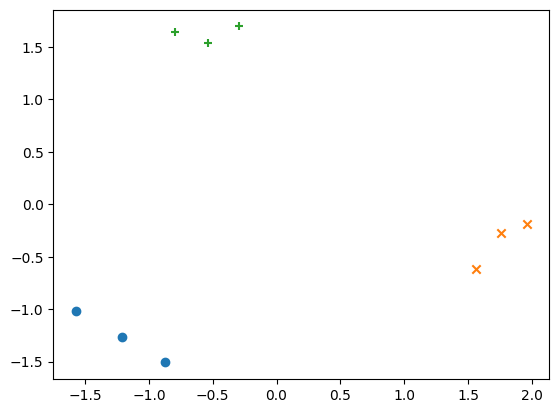

In [23]:
import matplotlib.pyplot as plt
plt.scatter(vec_all_pca[0:3, 0], vec_all_pca[0:3, 1], marker='o')
plt.scatter(vec_all_pca[3:6, 0], vec_all_pca[3:6, 1], marker='x')
plt.scatter(vec_all_pca[6:9, 0], vec_all_pca[6:9, 1], marker='+')
plt.show()

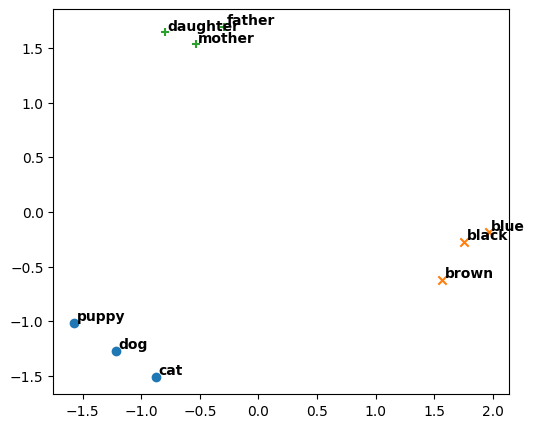

In [24]:
figure = plt.figure(figsize=(20,5))
ax = figure.add_subplot(1, 3, 1)
ax.scatter(vec_all_pca[0:3, 0], vec_all_pca[0:3, 1], marker='o')
ax.scatter(vec_all_pca[3:6, 0], vec_all_pca[3:6, 1], marker='x')
ax.scatter(vec_all_pca[6:9, 0], vec_all_pca[6:9, 1], marker='+')
for i in range(9):
    ax.text(vec_all_pca[i, 0] + 0.02, vec_all_pca[i, 1] + 0.02, all_word[i],
            fontdict={'weight': 'bold', 'size': 10})

In [25]:
sentences = [
    ['I', 'like', 'dog'],
    ['I', 'like', 'puppy'],
    ['This', 'car', 'is', 'black'],
    ['This', 'car', 'is', 'blue'],
]
model = gensim.models.Word2Vec(sentences=sentences, vector_size=5, min_count=1, window=2)
print(model.wv['dog'])
print(model.wv.similarity('dog', 'puppy'))
print(model.wv.similarity('black', 'blue'))
print(model.wv.similarity('dog', 'blue'))

[-0.192071    0.10014586 -0.17519173 -0.0878365  -0.000702  ]
0.6748309
0.93238866
0.0668968
